In [1]:
#orange
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='3'  #No logging TF

import tensorflow as tf
import numpy as np
import time
from Generator import OmniglotGenerator
from numpy import *;
import random

other_class=0
nb_class =10+other_class
input_size = 784
img_size=(28,28)
batch_size_om = 16
nb_samples_per_class = 17
train_samples_per_class=1

train_samples=17
mb_size = 64

generator1 = OmniglotGenerator(data_folder='/home/pt/test1/data/omtrain', \
                               batch_size=batch_size_om, nb_samples=nb_class,\
                               nb_samples_per_class=nb_samples_per_class,\
                               max_rotation=0., max_shift=0.,img_size=img_size, max_iter=None,\
                               train_samples_per_class=train_samples_per_class)
x_test,y_test=generator1.sample(nb_class)

example_outputs = y_test.reshape(batch_size_om*nb_class*nb_samples_per_class,1)
example_input=x_test.reshape(batch_size_om*nb_class*nb_samples_per_class,784)

#test_others_input = np.zeros((batch_size_om *nb_samples_per_class*other_class,input_size))
#test_others_outputs  =np.zeros((batch_size_om *nb_samples_per_class*other_class,nb_class))

train_input=np.zeros((batch_size_om *train_samples*(nb_class-other_class),input_size))
train_outputs=np.zeros((batch_size_om *train_samples*(nb_class-other_class),nb_class))
jte=0
jtr=0
jto=0
for k in range (nb_class):
    for i in range (batch_size_om *nb_samples_per_class*nb_class):
        if example_outputs[i]==k:
            train_input[jtr]=example_input[i]
            train_outputs[jtr][k]=1
            jtr+=1
            
                

    
    
def getbatchtrain(size):
    batchtrain=np.zeros((size,input_size))
    labeltrain=np.zeros((size,nb_class))
    for i in range(size):
        idx_1 = random.randint(0, batch_size_om *(nb_class-other_class)*train_samples-1)
        batchtrain[i,:] = train_input[idx_1,:]
        labeltrain[i,:]=train_outputs[idx_1,:]
    return batchtrain,labeltrain

def getbatchtrain2(size):
    batchtrain=np.zeros((size,input_size))
    labeltrain=np.zeros((size,nb_class))
    batchtrain2=np.zeros((size,input_size))
    labeltrain2=np.zeros((size,nb_class))
    for i in range(size):
        idx_1 = random.randint(0, batch_size_om *(nb_class-other_class)*train_samples-1)
        jjj=idx_1/(batch_size_om*train_samples)
        idx_2 = random.randint(int(jjj)*(batch_size_om*train_samples),int(jjj+1)*(batch_size_om*train_samples)-1)
        batchtrain[i,:] = train_input[idx_1,:]
        labeltrain[i,:]=train_outputs[idx_1,:]
        batchtrain2[i,:] = train_input[idx_2,:]
        labeltrain2[i,:]=train_outputs[idx_2,:]
    return batchtrain,labeltrain,batchtrain2,labeltrain2

z,_=getbatchtrain(64)
#z,_=getbatchone(10)
z.shape



(64, 784)

In [2]:
#CVAE2
from __future__ import division, print_function, absolute_import

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
#mnist = input_data.read_data_sets("/home/pt/test1/ELM/data", one_hot=True)
# Parameters
learning_rate2 = 0.001
num_steps2 =160000
batch_size2 = 64
y_dim2=784
y_dim22=10
# Network Parameters
image_dim2= 784 # MNIST images are 28x28 pixels
hidden_dim20 = 512*2
hidden_dim2 = 512
hidden_dim22 = 512
hidden_dim23=256
hidden_dim24=128
hidden_dim25=10
latent_dim2 =2

# A custom initialization (see Xavier Glorot init)
def glorot_init(shape):
    return tf.random_normal(shape=shape, stddev=1. / tf.sqrt(shape[0] / 2.))

def sample_c(m, n, ind=-1):
    c = np.zeros([m,n])
    for i in range(m):
        if ind<0:
            ind = np.random.randint(10)
        c[i,ind] = 1
    return c





In [5]:
# Variables
weights2 = {
     'encoder_h01': tf.Variable(glorot_init([y_dim2, hidden_dim2])), 
    'encoder_h02': tf.Variable(glorot_init([hidden_dim2, hidden_dim23])), 
    'encoder_h03': tf.Variable(glorot_init([hidden_dim23, hidden_dim24])), 
    
    'encoder_h1': tf.Variable(glorot_init([image_dim2+hidden_dim24+y_dim22, hidden_dim2])), 
    'z_mean': tf.Variable(glorot_init([hidden_dim2, latent_dim2])),
    'z_std': tf.Variable(glorot_init([hidden_dim2, latent_dim2])),
    'decoder_h01': tf.Variable(glorot_init([y_dim2, hidden_dim2])),
    'decoder_h02': tf.Variable(glorot_init([hidden_dim2, hidden_dim23])),
    'decoder_h03': tf.Variable(glorot_init([hidden_dim23, hidden_dim24])),
    
    'decoder_h1': tf.Variable(glorot_init([latent_dim2+hidden_dim24+y_dim22, hidden_dim22])),
    'decoder_h2': tf.Variable(glorot_init([hidden_dim22, hidden_dim23])),
    'decoder_h3': tf.Variable(glorot_init([hidden_dim23, hidden_dim22])),

    'decoder_out': tf.Variable(glorot_init([hidden_dim22, image_dim2]))
}
biases2 = {
    'encoder_b01': tf.Variable(glorot_init([hidden_dim2])),
    'encoder_b02': tf.Variable(glorot_init([hidden_dim23])),
    'encoder_b03': tf.Variable(glorot_init([hidden_dim24])),
    
    'encoder_b1': tf.Variable(glorot_init([hidden_dim2])),
    'z_mean': tf.Variable(glorot_init([latent_dim2])),
    'z_std': tf.Variable(glorot_init([latent_dim2])),
    'decoder_b01': tf.Variable(glorot_init([hidden_dim2])),
    'decoder_b02': tf.Variable(glorot_init([hidden_dim23])),
    'decoder_b03': tf.Variable(glorot_init([hidden_dim24])),
    
    'decoder_b1': tf.Variable(glorot_init([hidden_dim22])),
    'decoder_b2': tf.Variable(glorot_init([hidden_dim23])),
    'decoder_b3': tf.Variable(glorot_init([hidden_dim22])),

    'decoder_out': tf.Variable(glorot_init([image_dim2]))
}

# Building the encoder
input_image2 = tf.placeholder(tf.float32, shape=[None, image_dim2])


y2 = tf.placeholder(tf.float32, shape=[None, y_dim2])
y22 = tf.placeholder(tf.float32, shape=[None, y_dim22])

encoder2 = tf.matmul(y2, weights2['encoder_h01']) + biases2['encoder_b01']
encoder2 = tf.nn.tanh(encoder2)
encoder2 = tf.matmul(encoder2, weights2['encoder_h02']) + biases2['encoder_b02']
encoder2 = tf.nn.tanh(encoder2)
encoder2 = tf.matmul(encoder2, weights2['encoder_h03']) + biases2['encoder_b03']
encoder2 = tf.nn.tanh(encoder2)


encoder2 = tf.matmul(tf.concat([input_image2,encoder2,y22], 1), weights2['encoder_h1']) + biases2['encoder_b1']
encoder2 = tf.nn.tanh(encoder2)


z_mean2 = tf.matmul(encoder2, weights2['z_mean']) + biases2['z_mean']
z_std2 = tf.matmul(encoder2, weights2['z_std']) + biases2['z_std']

# Sampler: Normal (gaussian) random distribution
eps2 = tf.random_normal(tf.shape(z_std2), dtype=tf.float32, mean=0., stddev=1.0,
                       name='epsilon')
z2 = z_mean2 + tf.exp(z_std2 / 2) * eps2

# Building the decoder (with scope to re-use these layers later)
decoder2 = tf.matmul(y2, weights2['decoder_h01']) + biases2['decoder_b01']
decoder2 = tf.nn.tanh(decoder2)
decoder2 = tf.matmul(decoder2, weights2['decoder_h02']) + biases2['decoder_b02']
decoder2 = tf.nn.tanh(decoder2)
decoder2 = tf.matmul(decoder2, weights2['decoder_h03']) + biases2['decoder_b03']
decoder2 = tf.nn.tanh(decoder2)


decoder2 = tf.matmul(tf.concat([z2,decoder2,y22], 1), weights2['decoder_h1']) + biases2['decoder_b1']
decoder2 = tf.nn.tanh(decoder2)
decoder2 = tf.matmul(decoder2, weights2['decoder_h2']) + biases2['decoder_b2']
decoder2 = tf.nn.tanh(decoder2)
decoder2 = tf.matmul(decoder2, weights2['decoder_h3']) + biases2['decoder_b3']
decoder2 = tf.nn.tanh(decoder2)

decoder2 = tf.matmul(decoder2, weights2['decoder_out']) + biases2['decoder_out']
decoder2 = tf.nn.sigmoid(decoder2)

# Define VAE Loss
def vae_loss2(x_reconstructed, x_true):
    # Reconstruction loss
    encode_decode_loss = x_true * tf.log(1e-10 + x_reconstructed) \
                         + (1 - x_true) * tf.log(1e-10 + 1 - x_reconstructed)
    encode_decode_loss = -tf.reduce_sum(encode_decode_loss, 1)
    # KL Divergence loss
    kl_div_loss = 1 + z_std2 - tf.square(z_mean2) - tf.exp(z_std2)
    kl_div_loss = -0.5 * tf.reduce_sum(kl_div_loss, 1)
    return tf.reduce_mean(encode_decode_loss + kl_div_loss)

loss_op2 = vae_loss2(decoder2, input_image2)
optimizer2 = tf.train.RMSPropOptimizer(learning_rate=learning_rate2)
train_op2 = optimizer2.minimize(loss_op2)


In [6]:
#CVAE
from __future__ import division, print_function, absolute_import

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
#mnist = input_data.read_data_sets("/home/pt/test1/ELM/data", one_hot=True)
# Parameters
learning_rate = 0.001
num_steps =80000
batch_size = 64
y_dim=10
# Network Parameters
image_dim = 784 # MNIST images are 28x28 pixels
hidden_dim = 512
hidden2_dim = 256
hidden3_dim = 512*2
latent_dim = 2

# A custom initialization (see Xavier Glorot init)
def glorot_init(shape):
    return tf.random_normal(shape=shape, stddev=1. / tf.sqrt(shape[0] / 2.))

# Variables
weights = {
    'encoder_h1': tf.Variable(glorot_init([image_dim+y_dim, hidden_dim])),
    'z_mean': tf.Variable(glorot_init([hidden_dim, latent_dim])),
    'z_std': tf.Variable(glorot_init([hidden_dim, latent_dim])),
    'decoder_h1': tf.Variable(glorot_init([latent_dim+y_dim, hidden_dim])),
    'decoder_h2': tf.Variable(glorot_init([hidden_dim, hidden2_dim])),
    'decoder_h3': tf.Variable(glorot_init([hidden2_dim, hidden_dim])),
    'decoder_out': tf.Variable(glorot_init([hidden_dim, image_dim]))
}
biases = {
    'encoder_b1': tf.Variable(glorot_init([hidden_dim])),
    'z_mean': tf.Variable(glorot_init([latent_dim])),
    'z_std': tf.Variable(glorot_init([latent_dim])),
    'decoder_b1': tf.Variable(glorot_init([hidden_dim])),
    'decoder_b2': tf.Variable(glorot_init([hidden2_dim])),
    'decoder_b3': tf.Variable(glorot_init([hidden_dim])),

    'decoder_out': tf.Variable(glorot_init([image_dim]))
}

# Building the encoder
input_image = tf.placeholder(tf.float32, shape=[None, image_dim])
noise_VAE=tf.placeholder(tf.float32, shape=[None, image_dim])

y = tf.placeholder(tf.float32, shape=[None, y_dim])

encoder = tf.matmul(tf.concat([input_image,y], 1), weights['encoder_h1']) + biases['encoder_b1']
encoder = tf.nn.tanh(encoder)
z_mean = tf.matmul(encoder, weights['z_mean']) + biases['z_mean']
z_std = tf.matmul(encoder, weights['z_std']) + biases['z_std']

# Sampler: Normal (gaussian) random distribution
eps = tf.random_normal(tf.shape(z_std), dtype=tf.float32, mean=0., stddev=1.0,
                       name='epsilon')
z = z_mean + tf.exp(z_std / 2) * eps

# Building the decoder (with scope to re-use these layers later)
decoder = tf.matmul(tf.concat([z,y], 1), weights['decoder_h1']) + biases['decoder_b1']
decoder = tf.nn.tanh(decoder)
decoder = tf.matmul(decoder, weights['decoder_h2']) + biases['decoder_b2']
decoder = tf.nn.tanh(decoder)
decoder = tf.matmul(decoder, weights['decoder_h3']) + biases['decoder_b3']
decoder = tf.nn.tanh(decoder)

decoder = tf.matmul(decoder, weights['decoder_out']) + biases['decoder_out']
decoder = tf.nn.sigmoid(decoder)

# Define VAE Loss
def vae_loss(x_reconstructed, x_true):
    # Reconstruction loss
    encode_decode_loss = x_true * tf.log(1e-10 + x_reconstructed) \
                         + (1 - x_true) * tf.log(1e-10 + 1 - x_reconstructed)
    encode_decode_loss = -tf.reduce_sum(encode_decode_loss, 1)
    # KL Divergence loss
    kl_div_loss = 1 + z_std - tf.square(z_mean) - tf.exp(z_std)
    kl_div_loss = -0.5 * tf.reduce_sum(kl_div_loss, 1)
    return tf.reduce_mean(encode_decode_loss + kl_div_loss)

loss_op = vae_loss(decoder, input_image)
optimizer = tf.train.RMSPropOptimizer(learning_rate=learning_rate)
train_op = optimizer.minimize(loss_op)

# Initialize the variables (i.e. assign their default value)
#init = tf.global_variables_initializer()

# Start Training
# Start a new TF session
#sess = tf.Session()

# Run the initializer
#sess.run(init)


In [7]:
sess = tf.Session()
saver = tf.train.Saver() 
sess.run(tf.global_variables_initializer())
#saver.restore(sess, "/home/pt/test1/omnist2/Utils/good-x1x2/drawmodel.ckpt")
for i in range(1, num_steps+1):
    # Prepare Data
    # Get the next batch of MNIST data (only images are needed, not labels)
    #batch_x, _ = mnist.train.next_batch(batch_size)
    #yin=np.zeros((batch_size,y_dim))
    # Train
    
    #x_train1,_,x_train2,_=getbatchtraintest(64)
    #x_train1,x_train2=getbatchtraintest(64)
    #X_mb,y_mb= mnist.train.next_batch(64)
    
    #noiseG1_in=np.random.uniform(-0.2, 0.2, size=[300, 784])
    #y_sample[:, 2] = 1
    
    x_train2,y_train2=getbatchtrain(64)

    #Z_sample = sample_Z(64, Z_dim1)
    #samples = sess.run(G_sample, feed_dict={Z: Z_sample, y1:y_train2})
    feed_dict = {input_image: x_train2,y:y_train2}
    _, l = sess.run([train_op, loss_op], feed_dict=feed_dict)
    
        
  
    if i % 1000 == 0 or i == 1:
        print('Step %i, Loss: %f' % (i, l))
        

noise_input = tf.placeholder(tf.float32, shape=[None, latent_dim])
#y = tf.placeholder(tf.float32, shape=[None, y_dim])
# Rebuild the decoder to create image from noise
decoder = tf.matmul(tf.concat([noise_input,y], 1), weights['decoder_h1']) + biases['decoder_b1']
decoder = tf.nn.tanh(decoder)
decoder = tf.matmul(decoder, weights['decoder_h2']) + biases['decoder_b2']
decoder = tf.nn.tanh(decoder)
decoder = tf.matmul(decoder, weights['decoder_h3']) + biases['decoder_b3']
decoder = tf.nn.tanh(decoder)
decoder = tf.matmul(decoder, weights['decoder_out']) + biases['decoder_out']
decoder = tf.nn.sigmoid(decoder)
n = 15
noise_dim=2
for i in range(1, num_steps2+1):
    # Prepare Data
    # Get the next batch of MNIST data (only images are needed, not labels)
    #batch_x, _ = mnist.train.next_batch(batch_size)
    #yin=np.zeros((batch_size,y_dim))
    # Train
    
    #x_train1,_,x_train2,_=getbatchtraintest(64)
    #x_train1,x_train2=getbatchtraintest(64)
    #X_mb,y_mb= mnist.train.next_batch(64)
    yset=sample_c(32,y_dim22)
    #noiseG1_in=np.random.uniform(-0.25, 0.25, size=[64, 784])
    #y_sample[:, 2] = 1
    ztest = np.random.uniform(-1., 1., size=[32, noise_dim])
    x_train2,y_train2=getbatchtrain(32)
    g = sess.run(decoder, feed_dict={noise_input: ztest,y:y_train2 })
    #Z_sample = sample_Z(64, Z_dim1)
    #samples = sess.run(G_sample, feed_dict={Z: Z_sample, y1:y_train2})
    feed_dict = {input_image2: x_train2,y2:g,y22:yset}
    _, l = sess.run([train_op2, loss_op2], feed_dict=feed_dict)
    
    if i%100:
        #ztest = np.random.uniform(-1., 1., size=[64, noise_dim])
        yset=sample_c(32,y_dim22)
        X_mb,y_mb,X_mb2,y_mb2=getbatchtrain2(32)
 
        feed_dict = {input_image2: X_mb,y2:X_mb2,y22:yset}
        _, l = sess.run([train_op2, loss_op2], feed_dict=feed_dict)
        
    
    if i % 1000 == 0 or i == 1:
       
        print('Step %i, Loss: %f' % (i, l))


Step 1, Loss: 603.653259
Step 1000, Loss: 96.250900
Step 2000, Loss: 71.366135
Step 3000, Loss: 70.519608
Step 4000, Loss: 66.392982
Step 5000, Loss: 77.639481
Step 6000, Loss: 68.681580
Step 7000, Loss: 72.698891
Step 8000, Loss: 73.861885
Step 9000, Loss: 69.623535
Step 10000, Loss: 75.493347
Step 11000, Loss: 73.034714
Step 12000, Loss: 71.965210
Step 13000, Loss: 74.968323
Step 14000, Loss: 73.059555
Step 15000, Loss: 70.153229
Step 16000, Loss: 63.888863
Step 17000, Loss: 70.437759
Step 18000, Loss: 73.679916
Step 19000, Loss: 80.404053
Step 20000, Loss: 85.109627
Step 21000, Loss: 74.473900
Step 22000, Loss: 74.443130
Step 23000, Loss: 70.863899
Step 24000, Loss: 69.418503
Step 25000, Loss: 79.423805
Step 26000, Loss: 72.888741
Step 27000, Loss: 68.835953
Step 28000, Loss: 65.902893
Step 29000, Loss: 74.328201
Step 30000, Loss: 72.579178
Step 31000, Loss: 73.807083
Step 32000, Loss: 68.275253
Step 33000, Loss: 77.060974
Step 34000, Loss: 72.645660
Step 35000, Loss: 71.673286
Step

KeyboardInterrupt: 

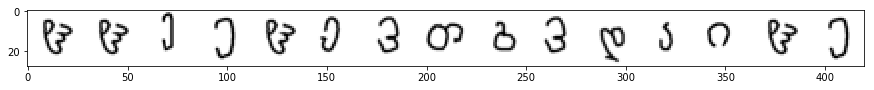

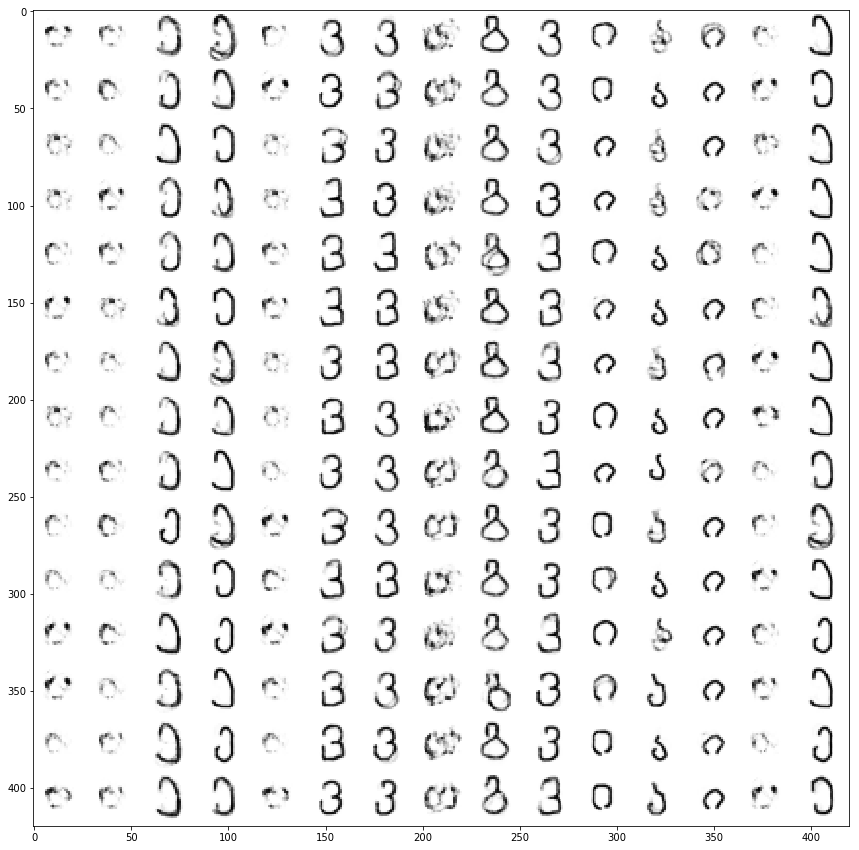

In [12]:

# Testing
# Generate images from noise, using the generator network.

noise_input2 = tf.placeholder(tf.float32, shape=[None, latent_dim2])
ysettest = tf.placeholder(tf.float32, shape=[None, y_dim22])
#y = tf.placeholder(tf.float32, shape=[None, y_dim])
# Rebuild the decoder to create image from noise

decoder2 = tf.matmul(y2, weights2['decoder_h01']) + biases2['decoder_b01']
decoder2 = tf.nn.tanh(decoder2)
decoder2 = tf.matmul(decoder2, weights2['decoder_h02']) + biases2['decoder_b02']
decoder2 = tf.nn.tanh(decoder2)
decoder2 = tf.matmul(decoder2, weights2['decoder_h03']) + biases2['decoder_b03']
decoder2 = tf.nn.tanh(decoder2)
decoder2 = tf.matmul(decoder2, weights2['decoder_h04']) + biases2['decoder_b04']
decoder2 = tf.nn.sigmoid(decoder2)

decoder2 = tf.matmul(tf.concat([noise_input2,decoder2,ysettest], 1), weights2['decoder_h1']) + biases2['decoder_b1']
decoder2 = tf.nn.tanh(decoder2)
decoder2 = tf.matmul(decoder2, weights2['decoder_h2']) + biases2['decoder_b2']
decoder2 = tf.nn.tanh(decoder2)
decoder2 = tf.matmul(decoder2, weights2['decoder_h3']) + biases2['decoder_b3']
decoder2 = tf.nn.tanh(decoder2)

decoder2 = tf.matmul(decoder2, weights2['decoder_out']) + biases2['decoder_out']
decoder2 = tf.nn.sigmoid(decoder2)

n = 15
noise_dim=2
#y1, y11= getbatchtrain(n)
ysettestin=sample_c(n,y_dim22)

X_mb,y_mb=getbatchtrain(n)

#X_mb,y_mb,X_mb2,y_mb2=getbatchtrain2(n)
#y1=net1.predict(y11)
canvas_orig = np.empty((28 * 1, 28 * n))
canvas_recon = np.empty((28 * n, 28 * n))

for i in range(1):
    # MNIST test set8
    g = (X_mb + 1.) / 2.
    # Reverse colours for better display
    g = -1 * (g - 1)
    #g=np.dot(batch_x, np.transpose(net.beta)) 
    #g=np.dot(net2input,net.beta)
    # Display original images
    for j in range(n):
        # Draw the generated digits
        canvas_orig[i * 28:(i + 1) * 28, j * 28:(j + 1) * 28] =g [j].reshape([28, 28])

for i in range(n):
    # Noise input.
    ztest = np.random.uniform(-1., 1., size=[n, noise_dim])
    #g1 = sess.run(decoder, feed_dict={noise_input: ztest,y:y_mb })
    #y1[:,9]=1
    # Generate image from noise.
    #decoder = np.dot(z, net4.beta) 
    #decoder= np.dot(decoder, net3.beta) 
    #decoder= np.dot(decoder, net2.beta) 
    g = sess.run(decoder2, feed_dict={noise_input2: ztest,y2:X_mb,ysettest:ysettestin })
    #g = net2.predict(z)
    #g= np.dot(z, net.beta) 
    # Rescale values to the original [0, 1] (from tanh -> [-1, 1])
    g = (g + 1.) / 2.
    # Reverse colours for better display
    g = -1 * (g - 1)
    for j in range(n):
        # Draw the generated digits
        canvas_recon[i * 28:(i + 1) * 28, j * 28:(j + 1) * 28] = g[j].reshape([28, 28])
        
plt.figure(figsize=(n, n))
plt.imshow(canvas_orig, origin="upper", cmap="gray")
plt.show()

plt.figure(figsize=(n, n))
plt.imshow(canvas_recon, origin="upper", cmap="gray")
plt.show()

In [9]:
#orange-test
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='3'  #No logging TF

import tensorflow as tf
import numpy as np
import time
from Generator import OmniglotGenerator
from numpy import *;
import random

other_class=0
nb_class =10+other_class
input_size = 784
img_size=(28,28)
batch_size_om = 16
nb_samples_per_class = 3
train_samples_per_class=1

train_samples=3
mb_size = 64

generator1 = OmniglotGenerator(data_folder='/home/pt/test1/data/omtest', \
                               batch_size=batch_size_om, nb_samples=nb_class,\
                               nb_samples_per_class=nb_samples_per_class,\
                               max_rotation=0., max_shift=0.,img_size=img_size, max_iter=None,\
                               train_samples_per_class=train_samples_per_class)
x_test,y_test=generator1.sample(nb_class)

example_outputs = y_test.reshape(batch_size_om*nb_class*nb_samples_per_class,1)
example_input=x_test.reshape(batch_size_om*nb_class*nb_samples_per_class,784)

#test_others_input = np.zeros((batch_size_om *nb_samples_per_class*other_class,input_size))
#test_others_outputs  =np.zeros((batch_size_om *nb_samples_per_class*other_class,nb_class))

train_input=np.zeros((batch_size_om *train_samples*(nb_class-other_class),input_size))
train_outputs=np.zeros((batch_size_om *train_samples*(nb_class-other_class),nb_class))
jte=0
jtr=0
jto=0
for k in range (nb_class):
    for i in range (batch_size_om *nb_samples_per_class*nb_class):
        if example_outputs[i]==k:
            train_input[jtr]=example_input[i]
            train_outputs[jtr][k]=1
            jtr+=1           
    
def getbatchtrain(size):
    batchtrain=np.zeros((size,input_size))
    labeltrain=np.zeros((size,nb_class))
    for i in range(size):
        idx_1 = random.randint(0, batch_size_om *(nb_class-other_class)*train_samples-1)
        batchtrain[i,:] = train_input[idx_1,:]
        labeltrain[i,:]=train_outputs[idx_1,:]
    return batchtrain,labeltrain

z,_=getbatchtrain(10)
#z,_=getbatchone(10)
z.shape



(10, 784)

In [19]:
sample_num=16
batch_size=64      
num_batches=40
z_dim=2
ysettestin=sample_c(batch_size,y_dim22)
input_imagez = tf.placeholder(tf.float32, shape=[None, image_dim])
yz = tf.placeholder(tf.float32, shape=[None, 10])

encoder2 = tf.matmul(y2, weights2['encoder_h01']) + biases2['encoder_b01']
encoder2 = tf.nn.sigmoid(encoder2)
encoder2 = tf.matmul(encoder2, weights2['encoder_h02']) + biases2['encoder_b02']
encoder2 = tf.nn.sigmoid(encoder2)
encoder2 = tf.matmul(encoder2, weights2['encoder_h03']) + biases2['encoder_b03']
encoder2 = tf.nn.sigmoid(encoder2)
encoder2 = tf.matmul(encoder2, weights2['encoder_h04']) + biases2['encoder_b04']
encoder2 = tf.nn.sigmoid(encoder2)

encoder2 = tf.matmul(tf.concat([input_imagez,encoder2,yz], 1), weights2['encoder_h1']) + biases2['encoder_b1']
encoder2 = tf.nn.tanh(encoder2)

z_mean = tf.matmul(encoder, weights['z_mean']) + biases['z_mean']
z_std = tf.matmul(encoder, weights['z_std']) + biases['z_std']

# Sampler: Normal (gaussian) random distribution
eps = tf.random_normal(tf.shape(z_std), dtype=tf.float32, mean=0., stddev=1.0,
                       name='epsilon')
z = z_mean + tf.exp(z_std / 2) * eps

for jj in range(1):
    

    for kk in range(1):
        tot_num_samples = min(sample_num, batch_size)
        image_frame_dim = int(np.floor(np.sqrt(tot_num_samples)))
        """ learned manifold """
        if z_dim == 2:
            assert z_dim== 2

            z_tot = None
            id_tot = None
            for idx in range(0, 100):
                #randomly sampling
                id = np.random.randint(0,num_batches)
                X_mb,y_mb= getbatchtrain(batch_size)
                
                #z_test = sess.run(z, feed_dict={input_image: X_mb,y:X_mb})
                z_test = sess.run(decoder2, feed_dict={input_imagez: X_mb,y2:X_mb,yz:ysettestin })
                if idx == 0:
                    z_tot = z_test
                    id_tot = y_mb
                else:
                    z_tot = np.concatenate((z_tot, z_test), axis=0)
                    id_tot = np.concatenate((id_tot, y_mb), axis=0)

def save_scattered_image(z, id, z_range_x, z_range_y, name='scattered_image.jpg'):
    N = 10
    plt.figure(figsize=(8, 6))
    plt.scatter(z[:, 0], z[:, 1], c=np.argmax(id, 1), marker='o', edgecolor='none', cmap=discrete_cmap(N, 'jet'))
    plt.colorbar(ticks=range(N))
    axes = plt.gca()
    axes.set_xlim([-z_range_x, z_range_x])
    axes.set_ylim([-z_range_y, z_range_y])
    plt.grid(True)
    plt.savefig(name)
    
def discrete_cmap(N, base_cmap=None):
    """Create an N-bin discrete colormap from the specified input map"""

    # Note that if base_cmap is a string or None, you can simply do
    #    return plt.cm.get_cmap(base_cmap, N)
    # The following works for string, None, or a colormap instance:

    base = plt.cm.get_cmap(base_cmap)
    color_list = base(np.linspace(0, 1, N))
    cmap_name = base.name + str(N)
    return base.from_list(cmap_name, color_list, N)
save_scattered_image(z_tot, id_tot, -4, 4, name='/home/pt/test1/omnist2/NTM/MANN/Utils'+ '/'+'_learned_manifold.png')

          

InvalidArgumentError: You must feed a value for placeholder tensor 'Placeholder_23' with dtype float and shape [?,2]
	 [[Node: Placeholder_23 = Placeholder[dtype=DT_FLOAT, shape=[?,2], _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]

Caused by op 'Placeholder_23', defined at:
  File "/root/miniconda3/envs/tensorflow/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/root/miniconda3/envs/tensorflow/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/root/miniconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/root/miniconda3/envs/tensorflow/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/root/miniconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "/root/miniconda3/envs/tensorflow/lib/python3.6/site-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/root/miniconda3/envs/tensorflow/lib/python3.6/site-packages/tornado/ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "/root/miniconda3/envs/tensorflow/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/root/miniconda3/envs/tensorflow/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/root/miniconda3/envs/tensorflow/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/root/miniconda3/envs/tensorflow/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/root/miniconda3/envs/tensorflow/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/root/miniconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/root/miniconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 235, in dispatch_shell
    handler(stream, idents, msg)
  File "/root/miniconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/root/miniconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/root/miniconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel/zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/root/miniconda3/envs/tensorflow/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2698, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/root/miniconda3/envs/tensorflow/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2802, in run_ast_nodes
    if self.run_code(code, result):
  File "/root/miniconda3/envs/tensorflow/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2862, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-18-014d29eba278>", line 5, in <module>
    noise_input2 = tf.placeholder(tf.float32, shape=[None, latent_dim2])
  File "/root/miniconda3/envs/tensorflow/lib/python3.6/site-packages/tensorflow/python/ops/array_ops.py", line 1599, in placeholder
    return gen_array_ops._placeholder(dtype=dtype, shape=shape, name=name)
  File "/root/miniconda3/envs/tensorflow/lib/python3.6/site-packages/tensorflow/python/ops/gen_array_ops.py", line 3091, in _placeholder
    "Placeholder", dtype=dtype, shape=shape, name=name)
  File "/root/miniconda3/envs/tensorflow/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/root/miniconda3/envs/tensorflow/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 2936, in create_op
    op_def=op_def)
  File "/root/miniconda3/envs/tensorflow/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 1464, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

InvalidArgumentError (see above for traceback): You must feed a value for placeholder tensor 'Placeholder_23' with dtype float and shape [?,2]
	 [[Node: Placeholder_23 = Placeholder[dtype=DT_FLOAT, shape=[?,2], _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]
